# Comparing EW and CapWeighted Portfolios

Load the EW and VW versions of the returns of the industry portfolios.

In [1]:
import numpy as np
import pandas as pd

import kit as erk

%load_ext autoreload
%autoreload 2

In [5]:
ind_cw = erk.get_ind_returns(weighting= 'vw')
ind_ew = erk.get_ind_returns(weighting= 'ew')

In [7]:
sr = pd.DataFrame({"CW": erk.sharpe_ratio(ind_cw["1945":], 0.03, 12), "EW": erk.sharpe_ratio(ind_ew["1945":], 0.03, 12)})
sr.head()

,CW,EW
Food,0.607082,0.626427
Beer,0.508778,0.528598
Smoke,0.531916,0.608404
Games,0.339515,0.308084
Books,0.325174,0.419349


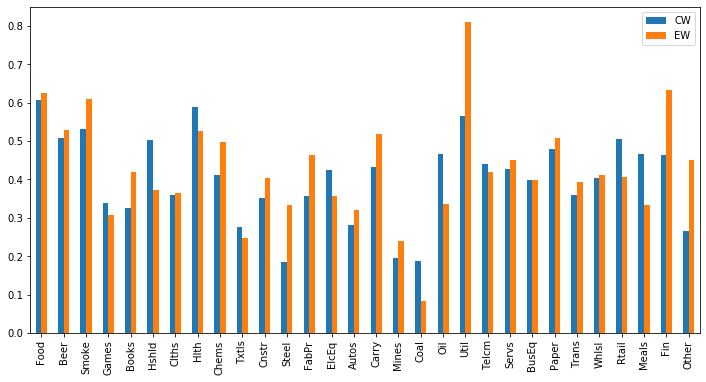

In [4]:
sr.plot.bar(figsize=(12, 6))

In [5]:
( (sr["EW"] > sr["CW"]).sum() / sr.shape[0] ) * 100

63.333333333333336

Text(0.5, 1.0, 'Average Trailing 5 Year Sharpe Ratio across 30 Industry Portfolios 1945-2018')

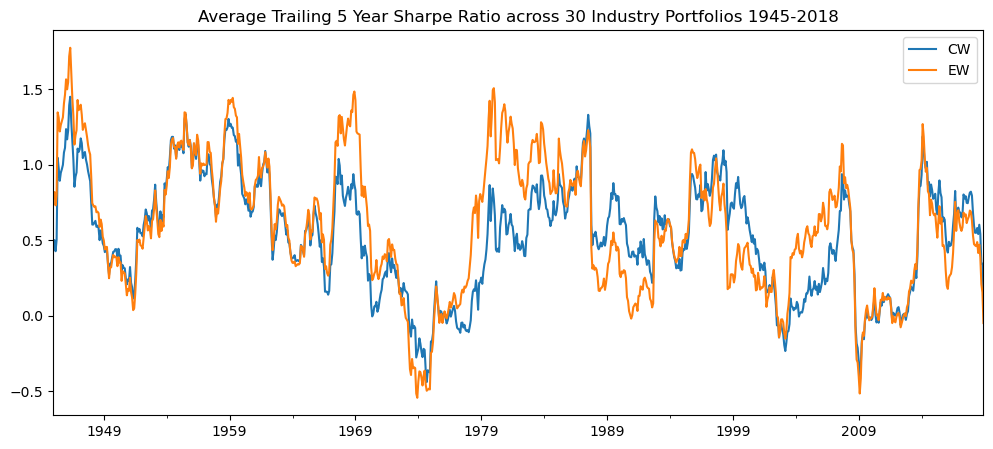

In [15]:
ax = ind_cw.rolling(60).apply(erk.sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}
                              ).mean(axis=1)["1945":].plot(figsize=(12,5), label="CW", legend=True)

ind_ew.rolling(60).apply(erk.sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}
                          ).mean(axis=1)["1945":].plot(ax=ax, label="EW", legend=True)


ax.set_title("Average Trailing 5 Year Sharpe Ratio across 30 Industry Portfolios 1945-2018")